In [ ]:
'''
GDrive link :- https://drive.google.com/drive/folders/11Vxcn1Xj513ZsZeTMwj-gT777CxKbkrG?usp=sharing

'''

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
#All ChatGPT prompts are given at the top of each block in the form #(nth prompt) ==> "Prompt"

In [ ]:
#1 ==> Generate a function to generate a Matrix X of size NXD for regeression from a generator matrix S by multiplying S with a randomly generated
#      matrix

def generate_input_matrix(N, S):
    """
    Generates an input data matrix X of size NxD for regression.

    Parameters:
    N : int
        Sample size (number of rows).
    S : numpy array of shape (MxD)
        Generator matrix.

    Returns:
    X : numpy array of shape (NxD)
        Generated input matrix.
    """
    # Size of S
    M, D = S.shape

    # Step 1: Generate a random matrix Z of size NxM with standard normal distribution
    Z = np.random.randn(N, M)

    # Step 2: Multiply Z with the generator matrix S to get X
    X = np.dot(Z, S)

    return X


In [ ]:
#Testing the function defined above
N = 5  # Number of samples
S = np.array([[1, 0], [0, 1]])  # Generator matrix (3x2)

X = generate_input_matrix(N, S)
print(X)
#Check Sucess

[[ 0.3428584  -0.42296531]
 [ 2.39554334  0.99621719]
 [-1.26147967 -1.00830969]
 [ 0.01811245 -0.23305868]
 [-0.07724147 -0.21410011]]


In [ ]:
#2 ==> Write a function to generate the target vector t of size Nx1 by utitlizing the function generater_input_matrix

#Function to generate the target vector
def generate_target_vector(X, w, sigma):
    """
    Generates a target vector t of size Nx1.

    Parameters:
    X : numpy array of shape (NxD)
        Data matrix.
    w : numpy array of shape (D+1,)
        Weight vector (includes the bias term as the last element).
    sigma : float
        Noise variance.

    Returns:
    t : numpy array of shape (Nx1)
        Generated target vector with added noise.
    """
    # Step 1: Check for dimension mismatch
    N, D = X.shape
    if len(w) != D + 1:
        raise ValueError(f"Dimension mismatch: X is {N}x{D}, but w should have {D+1} elements.")

    # Step 2: Multiply X with the first D elements of w (excluding the bias term)
    t = np.dot(X, w[:-1])  # w[:-1] selects the first D elements of w

    # Step 3: Add the bias term (last element of w)
    t = t + w[-1]

    # Step 4: Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(0, np.sqrt(sigma), size=N)
    t = t + noise

    return t.reshape(-1, 1)  # Ensure the output is Nx1


In [ ]:
#Testing the function generated above
N = 5   # Number of samples
D = 3   # Number of features (columns in X)
X = np.random.randn(N, D)  # Random data matrix of size NxD
w = np.array([0.5, -1.2, 0.8, 2.0])  # Weight vector of size D+1 (3 features + 1 bias)
sigma = 0.1  # Noise variance

t = generate_target_vector(X, w, sigma)
print(t)
#Working fine

[[1.03612922]
 [0.52240876]
 [4.159993  ]
 [1.8489381 ]
 [2.21275477]]


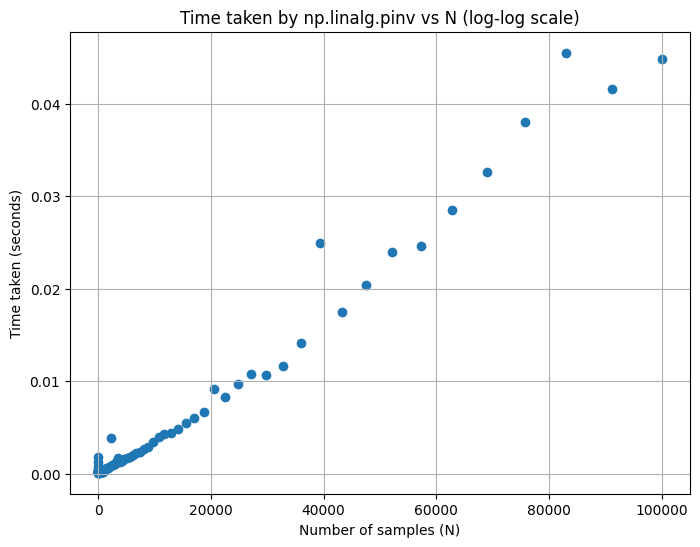

In [ ]:
#3 ==> Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalgpackage
#with respect to the size of the data matrix. Plot a graph of the time taken with respect to N(use log scale for both axes),
# with D fixed to 10.

import time #Importing time

def measure_pinv_time(N_values, D):
    """
    Measures the time taken to compute the pseudo-inverse for varying sample sizes N.

    Parameters:
    N_values : list of int
        Different values of N (number of samples) to test.
    D : int
        The fixed number of features (columns in the data matrix).

    Returns:
    times : list of float
        Time taken for each value of N.
    """
    times = [] #Array to store the values of different times

    for N in N_values:
        # Generate a random data matrix of size NxD
        X = generate_input_matrix(N, np.eye(D))

        # Measure time taken to compute the pseudo-inverse
        start_time = time.time()
        np.linalg.pinv(X) #Calling the function
        end_time = time.time()

        # Store the time taken
        times.append(end_time - start_time)

    return times

# Parameters
D = 10  # Fixed number of features
N_values = np.logspace(1, 5, num=100, dtype=int)  # N values from 10 to 100000 (logarithmic scale)

# Measure time for different N
times = measure_pinv_time(N_values, D)

# Plot the results (log-log scale)
plt.figure(figsize=(8, 6))
plt.scatter(N_values,times,marker = 'o')
plt.xlabel('Number of samples (N)')
plt.ylabel('Time taken (seconds)')
plt.title('Time taken by np.linalg.pinv vs N (log-log scale)')
plt.grid(True)
plt.show()


In [ ]:
'''
The algorithm is having a time complexity of O(n*m^(2)) , where m is the larger dimension .
Thus in our case, since we are fixing the value of D to be 10,for n lying between 1 and 11 , the order of time complexity will be
O(100.N).
Now for the values of N greater than that of 10, the time complexity will be O(10*N^(2)).
This is the reason for the strange behaviour of the algorithm.

Source of reference :- 1)https://stackoverflow.com/questions/58191604/what-is-the-time-complexity-of-the-pseudo-inverse-in-pytorch-i-e-torch-pinvers
                       2)Googling about Moore Penrose pseudo inverse
'''

In [ ]:
#4 ==> Generate to me a function to calculate the NRMSE value between a target vector t and predicted value y
def calculate_nrmse(t, y):
    """
    Calculates the normalized root mean squared error (NRMSE) between target vector t and predicted vector y.

    Parameters:
    t : numpy array of shape (N,)
        Target vector.
    y : numpy array of shape (N,)
        Predicted vector.

    Returns:
    nrmse : float
        Normalized root mean squared error.
    """
    # Step 1: Calculate RMSE
    rmse = np.sqrt(np.mean((t - y) ** 2))

    # Step 2: Normalize RMSE by the range of t (t_max - t_min)
    t_range = t.max() - t.min()

    #Checking for edge case in which t_range is 0
    if t_range == 0:
        raise ValueError("Target vector has zero range, normalization is not possible.")

    nrmse = rmse / t_range #Normalizing

    return nrmse


In [ ]:
# Example target and predicted values
t = np.array([3.0, 5.0, 2.5, 6.0])
y = np.array([2.8, 4.9, 2.7, 5.8])
mse = np.sqrt(np.mean((t-y)**2))
scale = max(t) - min(t)
nrmse_value = calculate_nrmse(t, y)
print("NRMSE:", nrmse_value)

NRMSE: 0.051507875363771306


In [ ]:
#Question 5
#5 ==> Generate to me a function to calculate the value of MSE gradient by using the functions provided above
def calculate_mse_gradient(X, t, w):
    """
    Calculates the gradient of the mean squared error (MSE) with respect to weights.

    Parameters:
    X : numpy array of shape (N, D)
        Feature matrix where N is the number of samples and D is the number of features.
    t : numpy array of shape (N,)
        Target vector.
    w : numpy array of shape (D,)
        Weight vector for the linear regression model.

    Returns:
    gradient : numpy array of shape (D,)
        Gradient of MSE with respect to the weights.
    """
    # Step 1: Calculate predicted values
    y_hat = np.dot(X, w)  # Predicted values

    # Step 2: Calculate the error
    error = t - y_hat  # Difference between target and predicted values

    # Step 3: Calculate the gradient of MSE
    N = len(t)  # Number of samples
    gradient = -2 / N * np.dot(X.T, error)  # Gradient of MSE

    return gradient


In [ ]:
# Example feature matrix (N=3, D=2)
X = np.array([[1, 2],
              [2, 3],
              [3, 4]])

# Example target vector
t = np.array([5, 7, 9])

# Example weight vector
w = np.array([0.1, 0.2])

# Calculate gradient of MSE
gradient = calculate_mse_gradient(X, t, w)
print("Gradient of MSE with respect to weights:", gradient)


Gradient of MSE with respect to weights: [-27.06666667 -39.46666667]


In [ ]:
#Question 6
#6 ==> Generate a function to find out L2 gradient wrt weights
def calculate_l2_gradient(w):
    """
    Calculates the gradient of the L2 norm of weights with respect to the weights.

    Parameters:
    w : numpy array of shape (D,)
        Weight vector.

    Returns:
    gradient : numpy array of shape (D,)
        Gradient of the L2 norm of weights.
    """
    # Step 1: Calculate the gradient of the squared L2 norm
    gradient = 2 * w  # Gradient of L2 norm squared

    return gradient

In [ ]:
# Example weight vector
w = np.array([0.5, -1.2, 0.8])

# Calculate gradient of L2 norm
l2_gradient = calculate_l2_gradient(w)
print("Gradient of L2 norm of weights:", l2_gradient)


Gradient of L2 norm of weights: [ 1.  -2.4  1.6]


In [ ]:
#Question 7
#7 ==> Generate a function for finding out L1 gradient wrt weights

def calculate_l1_gradient(w):
    """
    Calculates the subgradient of the L1 norm of weights with respect to the weights.

    Parameters:
    w : numpy array of shape (D,)
        Weight vector.

    Returns:
    gradient : numpy array of shape (D,)
        Subgradient of the L1 norm of weights.
    """
    # Step 1: Calculate the subgradient
    gradient = np.sign(w)  # This returns -1 for negative values, 1 for positive values, and 0 for zeros

    return gradient


In [ ]:
# Example weight vector
w = np.array([0.5, -1.2, 0.0, 3.5])

# Calculate subgradient of L1 norm
l1_gradient = calculate_l1_gradient(w)
print("Subgradient of L1 norm of weights:", l1_gradient)


Subgradient of L1 norm of weights: [ 1. -1.  0.  1.]


In [ ]:
#Question 8
#8 ==> Now implement a fuunction to calculate the gradient descent on MSE + lambda1*L1 + lambda2*L2

def gradient_descent(X, t, w, lambda1, lambda2, learning_rate=0.01, max_iter=1000, tol=1e-6):
    """
    Performs gradient descent to minimize the MSE with L1 and L2 regularization.

    Parameters:
    X : numpy array of shape (N, D)
        Feature matrix where N is the number of samples and D is the number of features.
    t : numpy array of shape (N,)
        Target vector.
    w : numpy array of shape (D,)
        Initial weight vector for the linear regression model.
    lambda1 : float
        Regularization parameter for L1 norm.
    lambda2 : float
        Regularization parameter for L2 norm.
    learning_rate : float
        Learning rate for gradient descent.
    max_iter : int
        Maximum number of iterations for gradient descent.
    tol : float
        Tolerance for stopping criterion based on the change in cost.

    Returns:
    w : numpy array of shape (D,)
        Optimized weight vector.
    costs : list of float
        List of cost values at each iteration.
    """
    N, D = X.shape #Extracting the dimensions
    costs = []  # To store cost values for each iteration

    for iteration in range(max_iter):

        # Step 1: Calculate the gradient of MSE
        mse_gradient = calculate_mse_gradient(X,t,w)

        # Step 2: Calculate the gradient of L1 and L2
        l1_gradient = calculate_l1_gradient(w) * lambda1        # L1 gradient (subgradient)
        l2_gradient = calculate_l2_gradient(w) * lambda2        # L2 gradient

        # Step 3: Total gradient
        total_gradient = mse_gradient + l1_gradient + l2_gradient

        # Step 4: Update weights
        w = w - learning_rate * total_gradient

        # Step 5: Calculate cost
        mse = np.mean(error ** 2)
        l1_norm = lambda1 * np.sum(np.abs(w))
        l2_norm = lambda2 * np.sum(w ** 2)
        cost = mse + l1_norm + l2_norm
        costs.append(cost)

        # Step 6: Stopping criterion
        if iteration > 0 and np.abs(costs[-1] - costs[-2]) < tol:
            print(f"Converged after {iteration} iterations.")
            break

    return w, costs

In [ ]:
# Example feature matrix (N=5, D=3)
X = np.array([[1, 2, 3],
              [1, 3, 4],
              [1, 4, 5],
              [1, 5, 6],
              [1, 6, 7]])

# Example target vector
t = np.array([5, 7, 9, 11, 13])

# Initial weight vector
initial_weights = np.zeros(X.shape[1])

# Regularization parameters
lambda1 = 0.1  # L1 regularization
lambda2 = 0.1  # L2 regularization

# Perform gradient descent
optimized_weights, costs = gradient_descent(X, t, initial_weights, lambda1, lambda2)

print("Optimized Weights:", optimized_weights)
print("Cost History:", costs)


Optimized Weights: [0.00126307 0.88413143 1.08854005]
Cost History: [89.35928, 1.0169120347200002, 0.4213256096217452, 0.4143013555149261, 0.41384397086024494, 0.4136515937179738, 0.413480145122501, 0.41331165259617597, 0.41314466724988, 0.4129790612862293, 0.41281481343660664, 0.4126519111184004, 0.4124903425468669, 0.4123300960983328, 0.4121711602579773, 0.4120135236147497, 0.4118571748600932, 0.41170210278698727, 0.41154829628901746, 0.41139574435946197, 0.4112444360903824, 0.411094360671724, 0.41094550739042546, 0.41079786562953446, 0.4106514248673342, 0.41050617467647477, 0.41036210472311596, 0.4102192047660742, 0.41007746465598044, 0.4099368743344445, 0.4097974238332259, 0.40965910327341504, 0.40952190286461976, 0.4093858129041586, 0.409250823776265, 0.409116925951295, 0.4089841099849444, 0.4088523665174718, 0.4087216862729302, 0.4085920600584044, 0.4084634787632555, 0.4083359333583736, 0.4082094148954353, 0.40808391450617, 0.40795942340163127, 0.40783593287147607, 0.407713434283

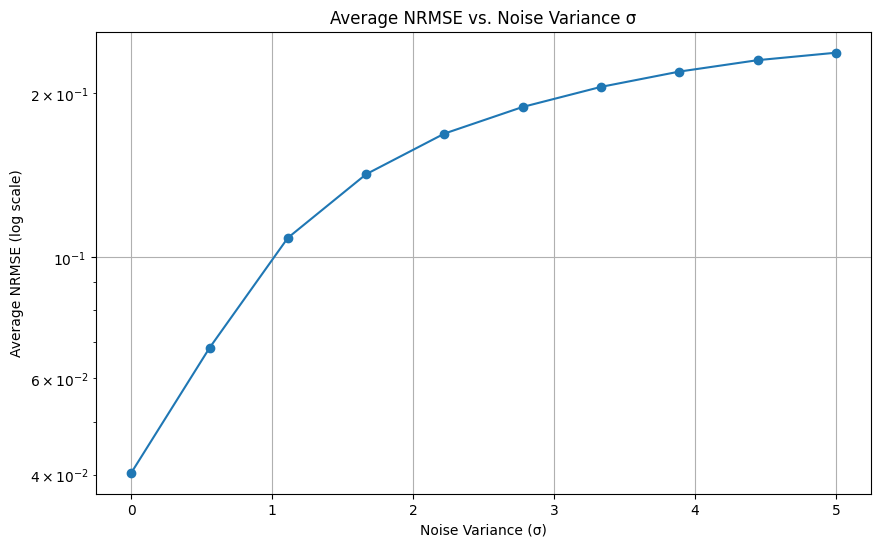

In [ ]:
#Question 9
#9 ==> (Examine the impact of σ on the NRMSE for linear regression using gradient descent.
#Average the results of the following experiment run five times for each value of σ where G is an identity matrix.
#Generate a random data matrix X and target vector t with noise variance σ, and split it into training and validation sub-matrices and sub-vectors.
#Train using gradient descent on training subset, and test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.)



# Function to perform the experiment for different noise variances
def experiment_noise_variance(sigma_values, num_runs=5, N=100, D=10, lambda1=0.1, lambda2=0.1):
    nrmse_results = [] #Array to store NRMSE values
    #Looping through each of the sigma values
    for sigma in sigma_values:
        nrmse_avg = 0
        for run in range(num_runs):
            # Generate random data
            np.random.seed(run)  # For reproducibility
            S = np.eye(D) #Generator matrix
            X = generate_input_matrix(N, S)  # Random data matrix
            w_true = np.random.randn(D)  # True weights
            noise = np.random.normal(0, sigma, N)  # Noise
            t = X @ w_true + noise  # Target vector with noise

            # Split into training and validation subsets (70% train, 30% validation)
            split_index = int(0.7 * N)
            X_train, X_val = X[:split_index], X[split_index:]
            t_train, t_val = t[:split_index], t[split_index:]

            # Initialize weights
            w_initial = np.zeros(D)

            # Train the model using gradient descent
            w_optimized = gradient_descent(X_train, t_train, w_initial, lambda1, lambda2)

            # Validate and calculate NRMSE
            y_val = np.dot(X_val, w_optimized)
            nrmse = calculate_nrmse(t_val, y_val)
            nrmse_avg += nrmse

        # Average the NRMSE over runs
        nrmse_results.append(nrmse_avg / num_runs)

    return nrmse_results

# Parameters for the experiment
sigma_values = np.linspace(0, 5, 10)  # Noise variance from 0 to 5
num_runs = 5

# Run the experiment
nrmse_results = experiment_noise_variance(sigma_values, num_runs)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, nrmse_results, marker='o')
plt.xscale('linear')
plt.yscale('log')
plt.title('Average NRMSE vs. Noise Variance σ')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE (log scale)')
plt.grid(True)
plt.show()


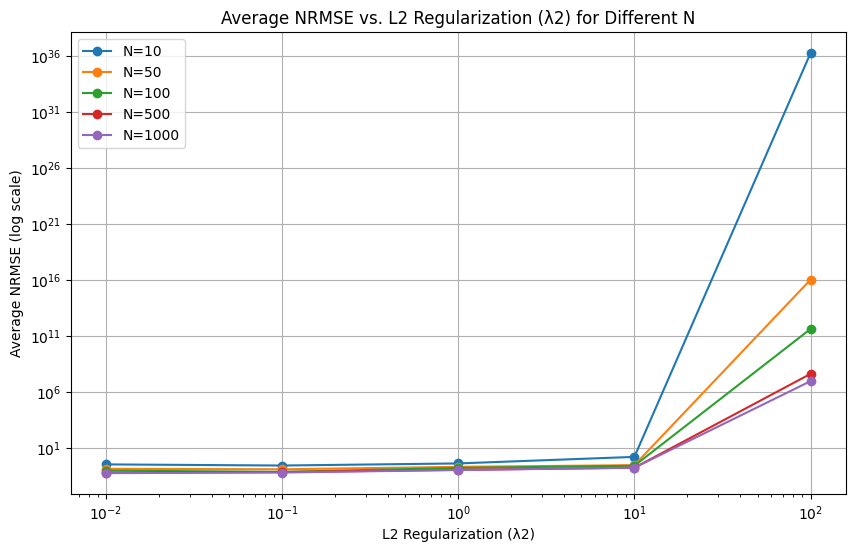

In [ ]:
#Question 10
#10 ==> Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.
#Create lists of N and λ2 values (use log scale, 5 each, 25 pairs).
#Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator
#matrix G and noise variance σ. Comment on the results.


from itertools import product #Importing the necessary function

# Function to perform the experiment for varying N and lambda2
def experiment_N_lambda2(N_values, lambda2_values, num_runs=5, D=10, sigma=1.0):
    nrmse_results = np.zeros((len(N_values), len(lambda2_values))) #Initializing the array to store nrmse results
    #Looping through the values of N and Lambda
    for i, N in enumerate(N_values):
        for j, lambda2 in enumerate(lambda2_values):
            nrmse_avg = 0

            for run in range(num_runs):
                # Generate random data
                G = np.eye(D)  # Fixed generator matrix (identity)
                X = generate_input_matrix(N,G)  # Random data matrix using G
                w_true = np.random.randn(D)  # True weights
                noise = np.random.normal(0, sigma, N)  # Noise
                t = X @ w_true + noise  # Target vector with noise

                # Split into training and validation subsets (70% train, 30% validation)
                split_index = int(0.7 * N)
                X_train, X_val = X[:split_index], X[split_index:]
                t_train, t_val = t[:split_index], t[split_index:]

                # Initialize weights
                w_initial = np.zeros(D)

                # Train the model using gradient descent
                w_optimized = gradient_descent(X_train, t_train, w_initial, 0.0, lambda2)

                # Validate and calculate NRMSE
                y_val = np.dot(X_val, w_optimized)
                nrmse = calculate_nrmse(t_val, y_val)
                nrmse_avg += nrmse

            # Average the NRMSE over runs
            nrmse_results[i, j] = nrmse_avg / num_runs

    return nrmse_results

# Define the range of N and lambda2 values (log scale)
N_values = [10, 50, 100, 500, 1000]  # Sample sizes
lambda2_values = [0.01, 0.1, 1.0, 10.0, 100.0]  # L2 regularization parameters

# Run the experiment
nrmse_results = experiment_N_lambda2(N_values, lambda2_values)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values):
    plt.plot(lambda2_values, nrmse_results[i], marker='o', label=f'N={N}')

plt.xscale('log')
plt.yscale('log')
plt.title('Average NRMSE vs. L2 Regularization (λ2) for Different N')
plt.xlabel('L2 Regularization (λ2)')
plt.ylabel('Average NRMSE (log scale)')
plt.legend()
plt.grid(True)
plt.show()


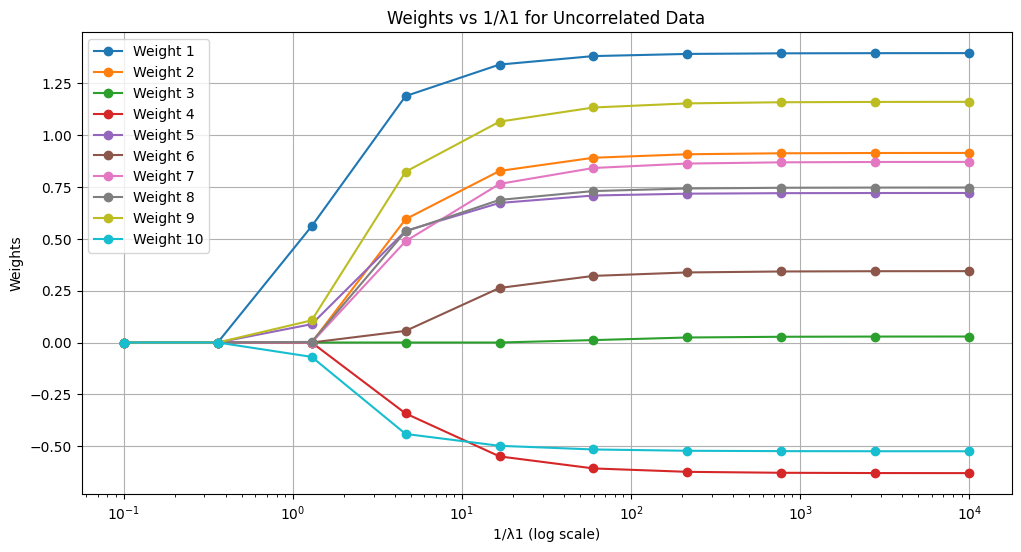

ValueError: operands could not be broadcast together with shapes (5,) (100,) 

In [ ]:
#Question 11
#11 ==> Examine the impact of λ1 on variable elimination. Generate a single data matrix Xand plotweights versus 1/λ1.
#Comment on the results. Introduce correlations in the columns of X and repeat the experiment. Are the results different?

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate weights with L1 regularization and MSE
def lasso_regression(X, t, lambda1):
    N, D = X.shape #Getting the shape of X
    w = np.zeros(D)  # Initialize weights

    # Stochastic gradient descent for Lasso (L1 regularization)
    learning_rate = 0.01
    max_iter = 1000
    for iteration in range(max_iter):
        # Calculate prediction
        y_hat = np.dot(X, w)

        # Calculate error
        error = t - y_hat

        # Gradient of MSE
        mse_gradient = -2 / N * np.dot(X.T, error)

        # L1 gradient (soft thresholding)
        l1_gradient = np.sign(w) * lambda1

        # Update weights (Gradient Descent with L1 regularization)
        w = w - learning_rate * (mse_gradient + l1_gradient)

        # Soft thresholding to handle L1 regularization
        w = np.sign(w) * np.maximum(np.abs(w) - learning_rate * lambda1, 0)

    return w

# Function to experiment with varying lambda1 values
def experiment_lambda1(N=100, D=10, lambda1_values=None):
    if lambda1_values is None:
        lambda1_values = np.logspace(-4, 1, 10)  # Values from 0.0001 to 10

    weights_list = [] #Array to store weights

    # Generate a random data matrix X and target vector t
    np.random.seed(42)  # For reproducibility
    S = np.eye(D)  # Fixed generator matrix (identity)
    X = generate_input_matrix(N,D)  # Random data matrix
    true_weights = np.random.randn(D)  # True weights
    noise = np.random.normal(0, 0.5, N)  # Noise
    t = X @ true_weights + noise  # Target vector with noise

    for lambda1 in lambda1_values:
        w = lasso_regression(X, t, lambda1)
        weights_list.append(w)

    return lambda1_values, np.array(weights_list)

# Function to introduce correlations in the columns of X
def generate_correlated_data(N, D, correlation=0.5):
    # Create a random data matrix
    X = np.random.randn(N, D)

    # Introduce correlation by multiplying with a correlation matrix
    A = np.eye(D) * (1 - correlation) + correlation  # Correlated data matrix
    X = X @ A  # Apply correlation
    return X

# Main experiment
lambda1_values, weights = experiment_lambda1(N=100, D=10)

# Plotting weights vs 1/λ1
plt.figure(figsize=(12, 6))
for i in range(weights.shape[1]):
    plt.plot(1 / lambda1_values, weights[:, i], marker='o', label=f'Weight {i+1}')

plt.xscale('log')
plt.title('Weights vs 1/λ1 for Uncorrelated Data')
plt.xlabel('1/λ1 (log scale)')
plt.ylabel('Weights')
plt.legend()
plt.grid()
plt.show()

# Now let's repeat the experiment with correlated data
correlated_X = generate_correlated_data(N=100, D=10)
weights_correlated = []

for lambda1 in lambda1_values:
    w = lasso_regression(correlated_X, t, lambda1)
    weights_correlated.append(w)

# Plotting weights vs 1/λ1 for correlated data
plt.figure(figsize=(12, 6))
for i in range(weights_correlated.shape[1]):
    plt.plot(1 / lambda1_values, weights_correlated[:, i], marker='o', label=f'Weight {i+1}')

plt.xscale('log')
plt.title('Weights vs 1/λ1 for Correlated Data')
plt.xlabel('1/λ1 (log scale)')
plt.ylabel('Weights')
plt.legend()
plt.grid()
plt.show()


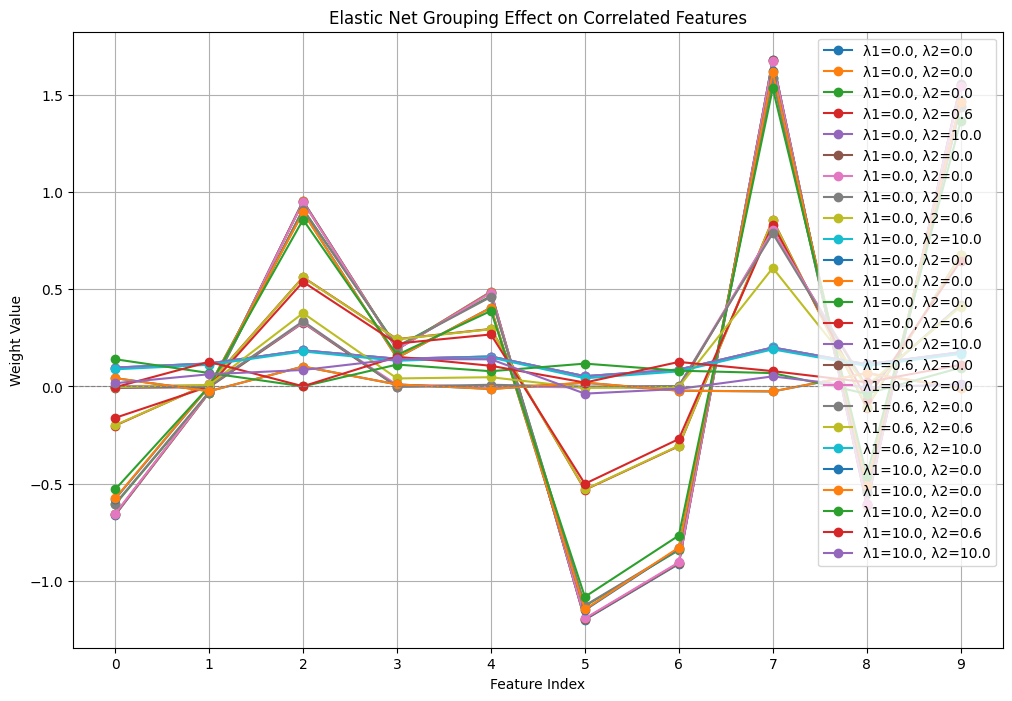

In [ ]:
#Question 12
#Define a function in order to show the grouping effect of elastic net on correlated columns of X

def elastic_net(X, t, lambda1, lambda2):
    N, D = X.shape #Getting the shape of Matrix X
    w = np.zeros(D)  # Initialize weights

    # Stochastic gradient descent for Elastic Net
    #Defining the parameters
    learning_rate = 0.01
    max_iter = 1000

    for iteration in range(max_iter):
        # Calculate prediction
        y_hat = np.dot(X, w)

        # Calculate error
        error = t - y_hat

        # Gradient of MSE
        mse_gradient = -2 / N * np.dot(X.T, error)

        # Gradient of L1 (Lasso) regularization
        l1_gradient = np.sign(w) * lambda1

        # Gradient of L2 (Ridge) regularization
        l2_gradient = lambda2 * w

        # Update weights (Gradient Descent with Elastic Net regularization)
        w = w - learning_rate * (mse_gradient + l1_gradient + l2_gradient)

    return w

#Function to generate correlated data
def generate_correlated_data(N, D, correlation=0.5):
    S = np.eye(D) #Defining the S matrix
    X = generate_input_matrix(N,S) #Generating X matrix
    A = np.eye(D) * (1 - correlation) + correlation  # Correlation matrix
    X = X @ A  # Apply correlation
    return X

#Function to plot
def plot_elastic_net_effect(N=100, D=10, lambda1_values=None, lambda2_values=None):
    if lambda1_values is None:
        lambda1_values = np.logspace(-4, 1, 5)  # Values from 0.0001 to 10
    if lambda2_values is None:
        lambda2_values = np.logspace(-4, 1, 5)  # Values from 0.0001 to 10

    # Generate correlated data
    correlated_X = generate_correlated_data(N, D)

    # Generate the target vector t
    true_weights = np.random.randn(D)  #Generating a
    noise = np.random.normal(0, 0.5, N) #Generating noise
    t = correlated_X @ true_weights + noise #Generating the value of t

    weights_matrix = np.zeros((len(lambda1_values), len(lambda2_values), D)) #Initializing the weight matrix
  #Looping through the values and appending the results
    for i, lambda1 in enumerate(lambda1_values):
        for j, lambda2 in enumerate(lambda2_values):
            w = elastic_net(correlated_X, t, lambda1, lambda2)
            weights_matrix[i, j, :] = w

    # Plotting
    plt.figure(figsize=(12, 8))
    for i in range(len(lambda1_values)):
        for j in range(len(lambda2_values)):
            plt.plot(weights_matrix[i, j, :], marker='o', label=f'λ1={lambda1_values[i]:.1f}, λ2={lambda2_values[j]:.1f}')
    plt.title('Elastic Net Grouping Effect on Correlated Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Weight Value')
    plt.xticks(np.arange(D))
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Run the experiment
plot_elastic_net_effect()


In [ ]:
#Question 13
#13 ==> Write a function for generating a Binary classifiaction vector t of  noise variance sigma

def generate_binary_classification_vector(X, w,b, noise_variance=0.1):
    """
    Generates a binary classification target vector t based on input features X,
    true weights w, and a specified noise variance.

    Parameters:
    X : ndarray
        The input feature matrix of shape (N, D) where N is the number of samples
        and D is the number of features.
    w : ndarray
        The true weight vector of shape (D,).
    noise_variance : float
        The variance of the noise to be added.

    Returns:
    t : ndarray
        The binary target vector of shape (N,) containing 0s and 1s.
    """
    # Calculate the linear combination
    linear_combination = X @ w  + b# Numpy dot product
    # Add Gaussian noise
    noise = np.random.normal(0, np.sqrt(noise_variance), size=linear_combination.shape)

    # Apply the sigmoid function to the linear combination (noisy)
    probabilities = 1 / (1 + np.exp(- (linear_combination + noise)))  # Logistic function

    # Assign binary labels based on the probabilities
    t = (probabilities >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

    return t

# Example usage
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    N, D = 100, 5  # Number of samples and features
    S = np.eye(5) #Identity matrix of dimension 5x5
    X = generate_input_matrix(N, S)  # Random data matrix
    true_weights = np.random.randn(D)  # True weights

    noise_variance = 0.1  # Specify noise variance
    t = generate_binary_classification_vector(X, true_weights, 0 ,noise_variance)

    print("Generated Binary Classification Vector (t):", t)



Generated Binary Classification Vector (t): [1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0]


In [ ]:
#Question 14
#14 ==> Write a function that calculates the gradient of Binary Cross Entropy for Logstic Regression


def sigmoid(z):
    """
    Compute the sigmoid function.

    Parameters:
    z : ndarray
        The input to the sigmoid function.

    Returns:
    ndarray
        The output after applying the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_gradient(X, y, w,b):
    """
    Compute the gradient of binary cross-entropy loss for logistic regression.

    Parameters:
    X : ndarray
        The input feature matrix of shape (N, D) where N is the number of samples
        and D is the number of features.
    y : ndarray
        The true binary labels of shape (N,).
    w : ndarray
        The weight vector of shape (D,).

    Returns:
    ndarray
        The gradient of the loss with respect to the weights of shape (D,).
    """
    N = X.shape[0]  # Number of samples
    z = X @ w + b # Linear combination
    y_hat = sigmoid(z)  # Predicted probabilities

    # Gradient calculation
    gradient = (y_hat - y) @ X / N  # Average gradient
    return gradient

# Example usage
if __name__ == "__main__":
    # np.random.seed(42)  # For reproducibility
    N, D = 100, 5  # Number of samples and features
    S = np.eye(5)  # Generator Matrix
    X = generate_input_matrix(N,S)  # Random feature matrix
    true_weights = np.random.randn(D)  # True weights
    noise = np.random.normal(0, 0.5, N)  # Noise
    y = (sigmoid(X @ true_weights + noise) >= 0.5).astype(int)  # Generate binary labels

    # Initialize weights for gradient computation
    w = np.random.randn(D)  # Randomly initialize weights

    # Compute gradient
    gradient = binary_cross_entropy_gradient(X, y, w , 5)
    print("Computed Gradient of Binary Cross-Entropy:", gradient)



Computed Gradient of Binary Cross-Entropy: [ 0.22050328  0.02703855  0.30763695 -0.02116426 -0.23940233]


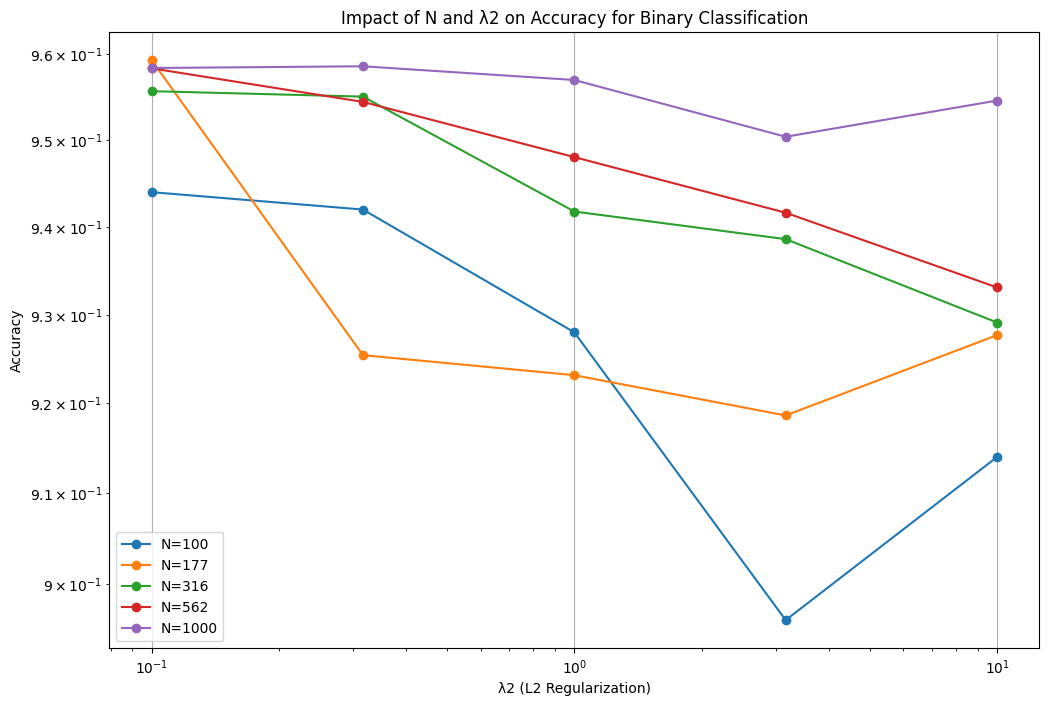

In [ ]:
#Question 15
#15 ==> Generate to me a code to analyze the relationship between N and Lambda_2 for Binary Classification
from scipy.special import expit  # Sigmoid function

# Function to compute Binary Cross-Entropy (BCE) loss
def binary_cross_entropy(t, y_hat):
    """Compute Binary Cross-Entropy (BCE) loss."""
    N = len(t) #Getting the value of N from t
    # Add a small epsilon to prevent log(0)
    epsilon = 1e-15

    y_hat = np.clip(y_hat, epsilon, 1 - epsilon) #Clipping the value of the array y_hat :- np.clip(araray,minimum,maximum)
    return -np.mean(t * np.log(y_hat) + (1 - t) * np.log(1 - y_hat)) #Returning the error

# Generate data for binary classification with noise variance σ
def generate_data_binary(N, D, noise_variance, G):
    """Generate data matrix X and binary target vector t with noise."""
    # Generate random data and apply generator matrix G
    X = np.random.randn(N, G.shape[0]) @ G  #Generating the matrix X
    true_weights = np.random.randn(G.shape[1])  # True weights
    noise = np.random.normal(0, np.sqrt(noise_variance), N)  # Add noise

    # Linear combination of weights and input, then apply sigmoid for binary target
    t_continuous = X @ true_weights + noise
    t = (expit(t_continuous) > 0.5).astype(int)  # Convert to binary labels
    return X, t, true_weights

# Gradient descent with Binary Cross-Entropy loss for logistic regression
def gradient_descent_bce(X, t, lambda2, learning_rate=0.001, max_iter=10000, display_loss_interval=1000):
    """Perform gradient descent to minimize Binary Cross-Entropy + λ2 L2 regularization."""
    N, D = X.shape
    w = np.zeros(D)  # Initialize weights
    cost_history = []
    for iteration in range(max_iter):
        # Predicted probabilities using sigmoid
        y_hat = expit(X @ w)

        # Binary Cross-Entropy Loss gradient
        error = y_hat - t  # Error term for BCE
        gradient = (X.T @ error) / N + 2 * lambda2 * w  # BCE gradient + L2 regularization

        # Update weights
        w -= learning_rate * gradient

    return w, cost_history

# Binary classification evaluation metric (Accuracy)
def accuracy(t, y_hat):
    """Compute accuracy for binary classification."""
    predictions = (y_hat > 0.5).astype(int)
    return np.mean(predictions == t)

# Experiment setup for binary classification with logistic regression
def experiment_binary_classification(N_values, lambda2_values, G, noise_variance):
    results = np.zeros((len(N_values), len(lambda2_values)))
    #Loooping through the values
    for i, N in enumerate(N_values):
        for j, lambda2 in enumerate(lambda2_values):
            accuracy_values = [] #Array to store the values
            for _ in range(5):  # Run experiment 5 times
                # Generate binary data
                X, t, true_weights = generate_data_binary(N, G.shape[1], noise_variance, G)

                # Perform gradient descent for BCE loss
                w,cost = gradient_descent_bce(X, t, lambda2, display_loss_interval=1000)

                # Predictions using the learned weights
                y_hat = expit(X @ w)  # Use sigmoid to get probabilities
                accuracy_values.append(accuracy(t, y_hat)) #Appending the accuracy values

            results[i, j] = np.mean(accuracy_values)  # Average accuracy over trials

    return results

# Set parameters for the experiment (Binary Classification)
N_values = np.logspace(2, 3, 5, dtype=int)  # 100 to 10000
lambda2_values = np.logspace(-1, 1, 5)  # 0.0001 to 10
G = np.eye(10)  # Fixed generator matrix (identity for simplicity)
noise_variance = 0.1

# Run the experiment for binary classification
results_binary = experiment_binary_classification(N_values, lambda2_values, G, noise_variance)

# Plotting results for binary classification
plt.figure(figsize=(12, 8))
for i, N in enumerate(N_values):
    plt.plot(lambda2_values, results_binary[i, :], marker='o', label=f'N={N}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('λ2 (L2 Regularization)')
plt.ylabel('Accuracy')
plt.title('Impact of N and λ2 on Accuracy for Binary Classification')
plt.legend()
plt.grid()
plt.show()
